In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#information about the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#describing about the datset
df.shape

(150, 6)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#finding the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

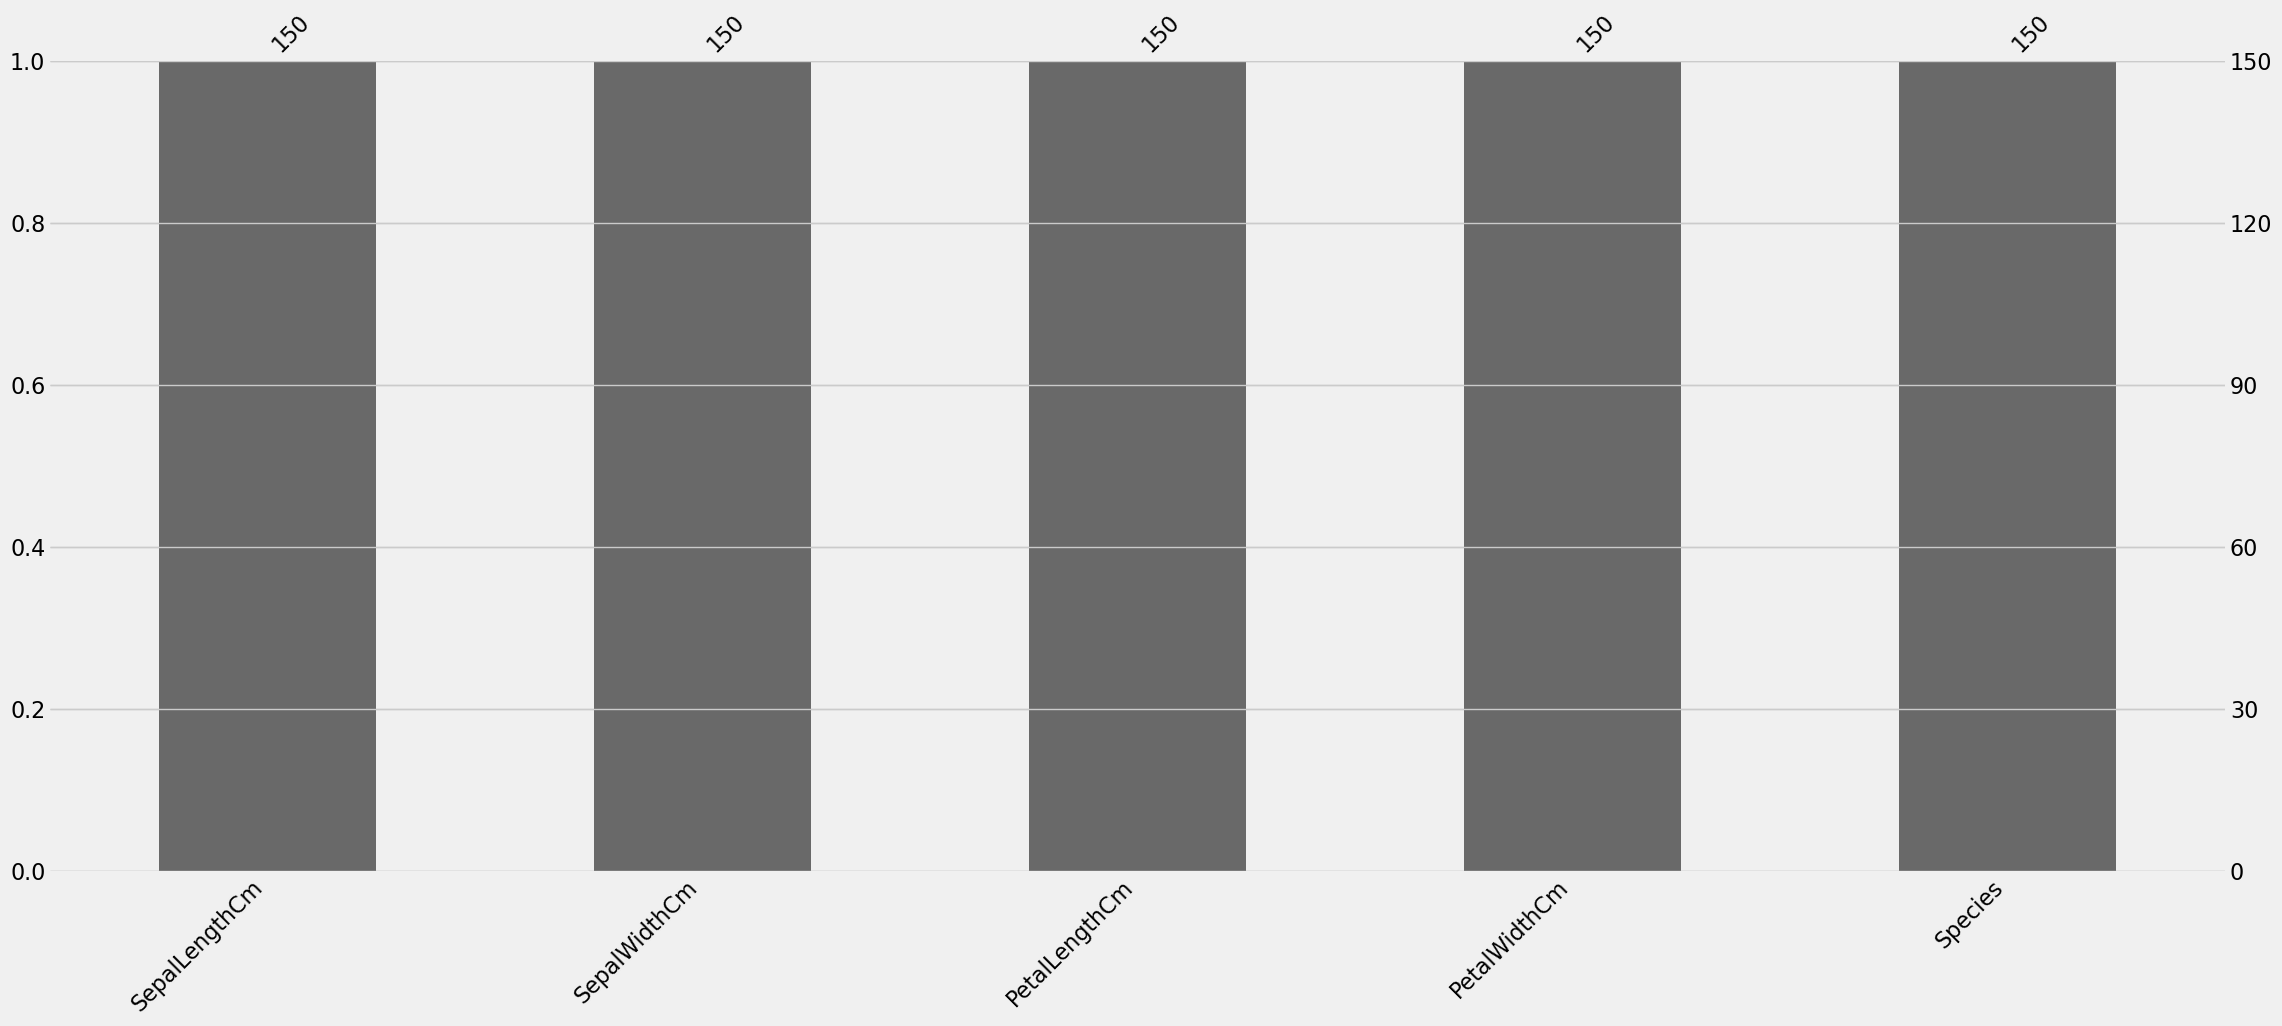

In [10]:
import missingno as msno
msno.bar(df)

In [11]:
!pip install missingno

In [12]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

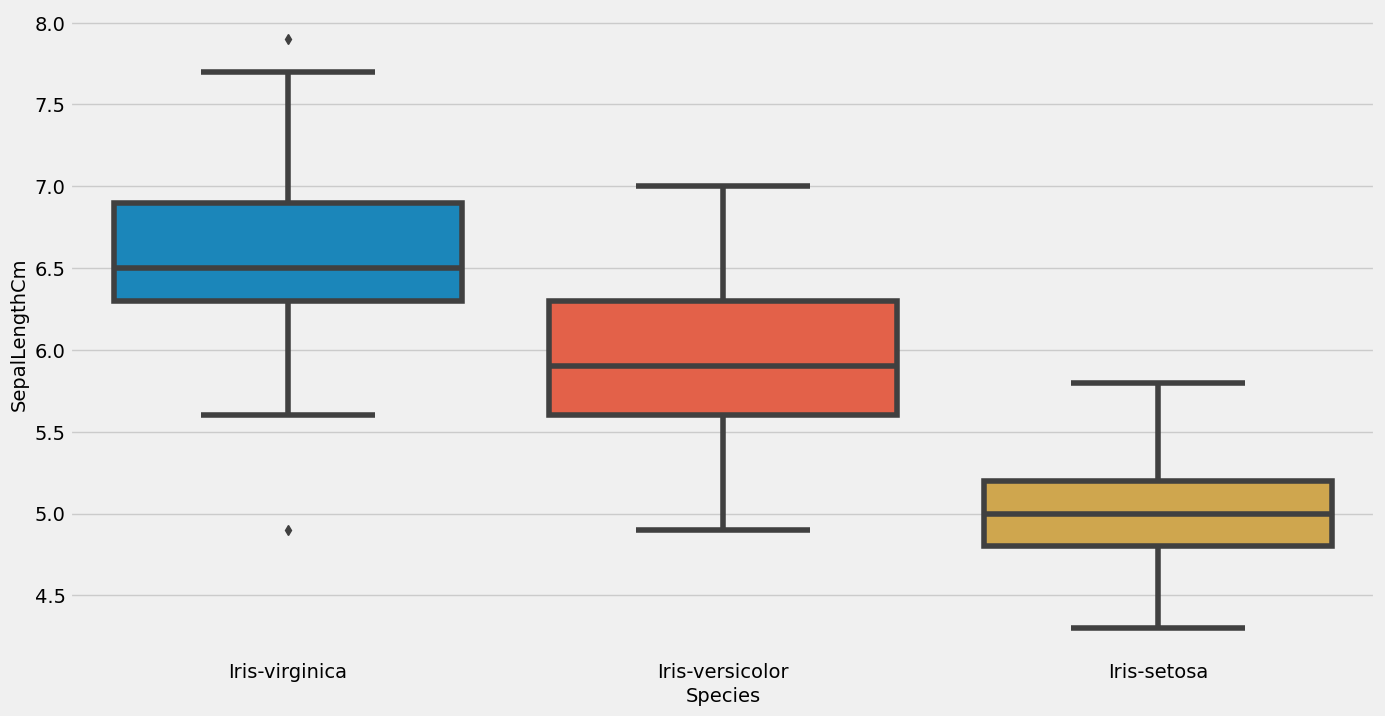

In [13]:
#Relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

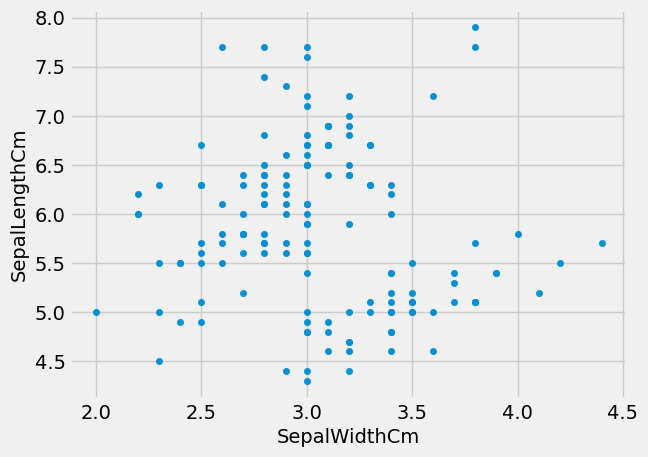

In [14]:
#Relationship between species and sepal width
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

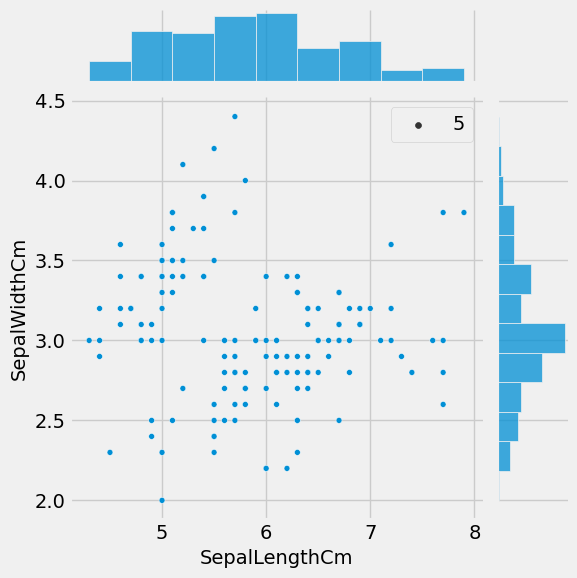

In [15]:
#Relationship between sepal width and sepal length
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

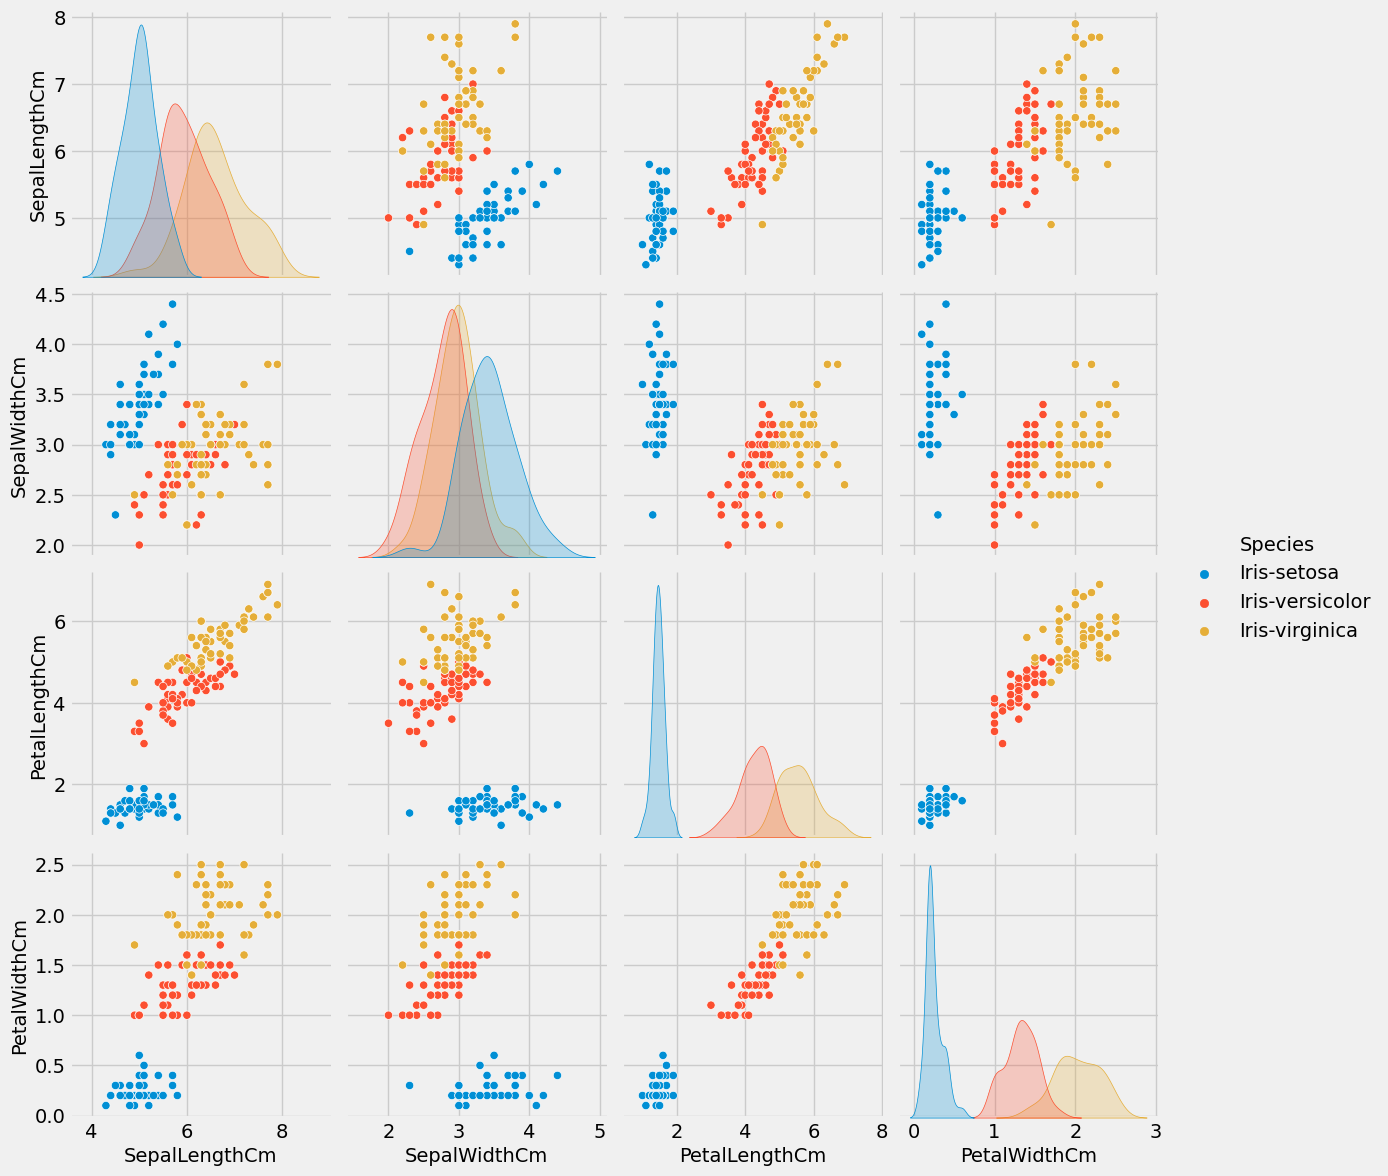

In [16]:
#Pairplot
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

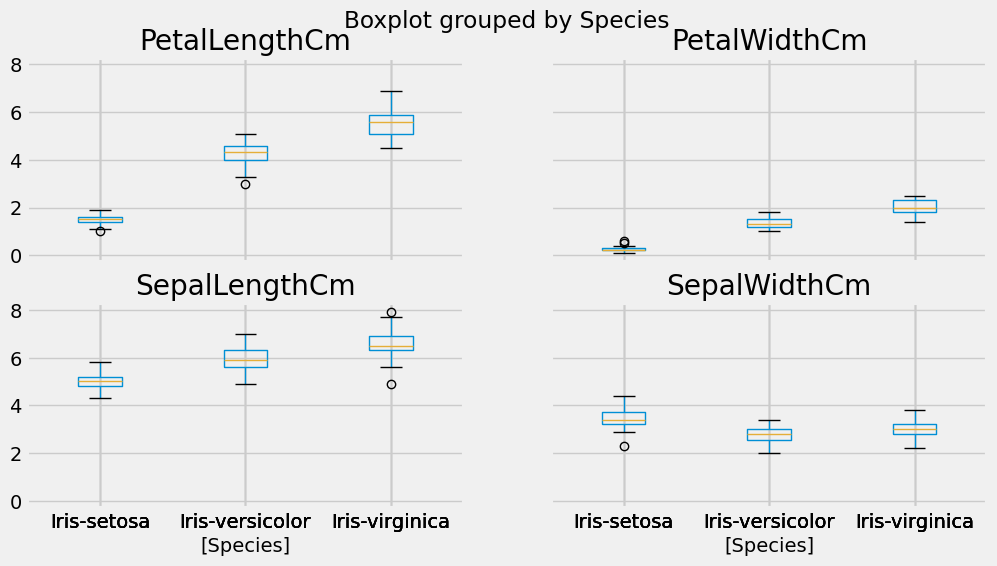

In [17]:
#Boxplot
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

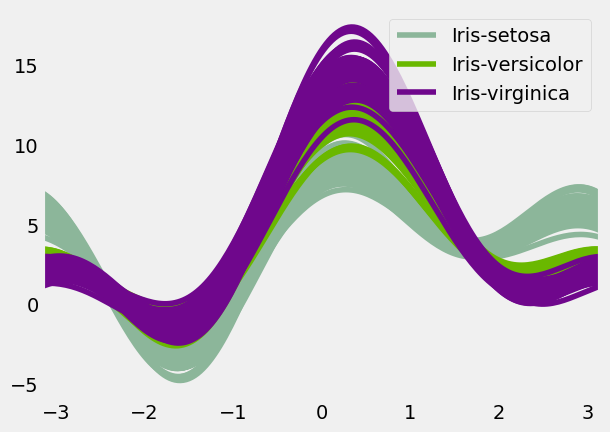

In [18]:
#Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1500x1500 with 0 Axes>

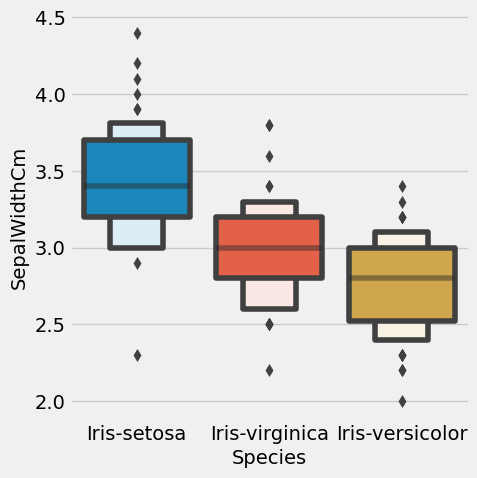

In [19]:
#CategoricalPlot
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

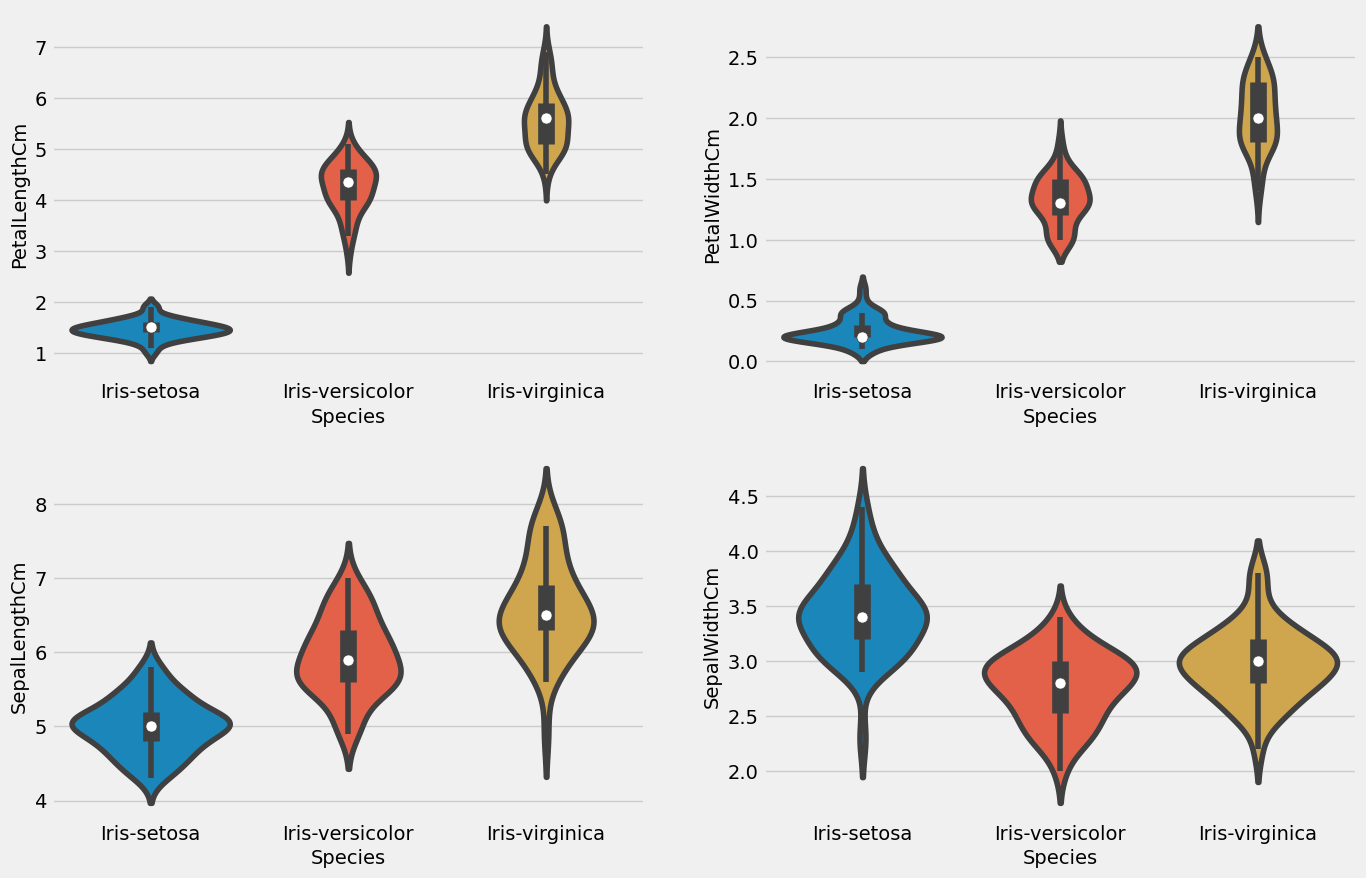

In [20]:
#Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [21]:
#Neural Network
X=df.drop('Species',axis=1)
y=df['Species']

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [23]:
!pip install keras

In [25]:
!pip install tensorflow

In [26]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [28]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 3s 106ms/step - loss: 2.2082 - accuracy: 0.3235 - val_loss: 1.9708 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 16ms/step - loss: 1.9049 - accuracy: 0.3235 - val_loss: 1.7099 - val_accuracy: 0.3111
Epoch 3/45
4/4 [==============================] - 0s 19ms/step - loss: 1.6579 - accuracy: 0.1569 - val_loss: 1.5058 - val_accuracy: 0.0000e+00
Epoch 4/45
4/4 [==============================] - 0s 20ms/step - loss: 1.4713 - accuracy: 0.0000e+00 - val_loss: 1.3362 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 17ms/step - loss: 1.3075 - accuracy: 0.3333 - val_loss: 1.2016 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 21ms/step - loss: 1.1767 - accuracy: 0.3333 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 7/45
4/4 [==============================] - 0s 24ms/step - loss: 1.0828 - accuracy: 0.3333 - val_loss: 1.0248 - val_accuracy: 0.4000
Epoch 8/45
4/4 [==

In [31]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.9111


[0.4624527096748352, 0.9111111164093018]

In [32]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 126ms/step
[[0.01846804 0.34208298 0.639449  ]
 [0.01577794 0.3185594  0.6656627 ]
 [0.12145051 0.50978935 0.3687601 ]
 [0.08174279 0.47499394 0.44326323]
 [0.84722    0.12524864 0.02753134]
 [0.08279919 0.5044901  0.41271073]
 [0.01685746 0.30522326 0.67791927]
 [0.01832898 0.31515345 0.66651756]
 [0.8497766  0.12390207 0.02632128]
 [0.03371115 0.39746866 0.5688202 ]]


In [33]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [34]:
history.history['accuracy']

[0.3235294222831726,
 0.3235294222831726,
 0.1568627506494522,
 0.0,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.5490196347236633,
 0.6666666865348816,
 0.8725489974021912,
 0.7058823704719543,
 0.656862735748291,
 0.6666666865348816,
 0.7254902124404907,
 0.8627451062202454,
 0.9411764740943909,
 0.8921568393707275,
 0.8725489974021912,
 0.9313725233078003,
 0.970588207244873,
 0.9607843160629272,
 0.970588207244873,
 0.8921568393707275,
 0.8823529481887817,
 0.843137264251709,
 0.8823529481887817,
 0.9411764740943909,
 0.970588207244873,
 0.9509803652763367,
 0.9117646813392639,
 0.8333333134651184,
 0.813725471496582,
 0.8921568393707275,
 0.9607843160629272,
 0.970588207244873,
 0.9215686321258545,
 0.843137264251709,
 0.7941176295280457,
 0.8039215803146362,
 0.9215686321258545,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873,
 0.970588207244873]

In [35]:
history.history['val_accuracy']

[0.3333333432674408,
 0.31111112236976624,
 0.0,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4000000059604645,
 0.6666666865348816,
 0.800000011920929,
 0.7333333492279053,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.8444444537162781,
 0.9777777791023254,
 0.8888888955116272,
 0.8444444537162781,
 0.8666666746139526,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.8444444537162781,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.8444444537162781,
 0.8222222328186035,
 0.7777777910232544,
 0.8222222328186035,
 0.9333333373069763,
 0.9555555582046509,
 0.8666666746139526,
 0.8222222328186035,
 0.7777777910232544,
 0.7777777910232544,
 0.8444444537162781,
 0.9333333373069763,
 0.9555555582046509,
 1.0,
 1.0,
 0.9555555582046509,
 0.9111111164093018]

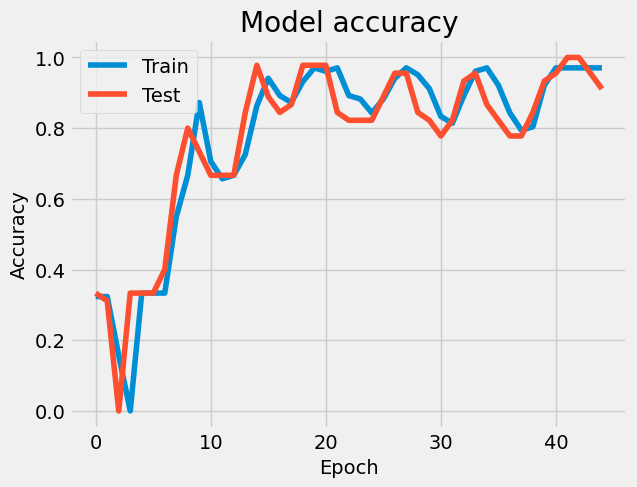

In [36]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()